In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# density from fractal dimension
Dp = 4.
rhow = 1025.
rhos = 2650.
nf = 2.
D = np.logspace(np.log10(20.),np.log10(1500.),7)
rhof = rhow + (rhos-rhow)*(D/Dp)**(nf-3.)
mu = 0.
sigma = 1.
ff = sigma * np.random.randn(7) + mu
print ff
print D
print rhof
print D.shape
Dbinlims = np.logspace(np.log10(2.),np.log10(2000.),11)
rbinlims = np.linspace(1025.,2650.,11)
print rbinlims
print Dbinlims
frac = np.zeros( (10,10) )
for i in np.arange(len(Dbinlims)-1):
    for j in np.arange(len(rbinlims)-1):
        frac[i,j]= np.random.randn()

[-1.7546646  -0.43289672  1.21782798 -0.97498926 -1.33217482  0.58511061
  0.43629254]
[   20.            41.07146614    84.34326653   173.20508076   355.68933045
   730.43411453  1500.        ]
[ 1350.          1183.26072482  1102.0660216   1062.5277675   1043.27437441
  1033.89881766  1029.33333333]
(7L,)
[ 1025.   1187.5  1350.   1512.5  1675.   1837.5  2000.   2162.5  2325.
  2487.5  2650. ]
[  2.00000000e+00   3.99052463e+00   7.96214341e+00   1.58865647e+01
   3.16978638e+01   6.32455532e+01   1.26191469e+02   2.51785082e+02
   5.02377286e+02   1.00237447e+03   2.00000000e+03]


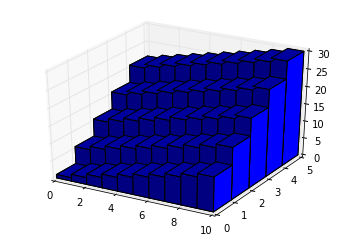

In [1]:
#
# Assuming you have "2D" dataset like the following that you need
# to plot.
#
data_2d = [ [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            [11, 12, 13, 14, 15, 16, 17, 18 , 19, 20],
            [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
            [21, 22, 23, 24, 25, 26, 27, 28, 29, 30] ]
#
# Convert it into an numpy array.
#
data_array = np.array(data_2d)
#
# Create a figure for plotting the data as a 3D histogram.
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
#
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data )
#
# Finally, display the plot.
#
plt.show()